<a href="https://colab.research.google.com/github/zfukuoka/Copying_a_sutra/blob/master/ISBN978-4-7981-6720-6/list4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# リスト 4.1 Irisデータセットを読み込む

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
print(iris.data[:10])
print(iris.data.shape)
print(iris.target)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


# リスト 4.2 データを前処理する

In [2]:
from sklearn import preprocessing
from keras.utils import np_utils

# ---- 入力データ ----
scaler = preprocessing.StandardScaler()
scaler.fit(iris.data)
x = scaler.transform(iris.data)
print(x[:10])

# ---- 正解データ ----
t = np_utils.to_categorical(iris.target)
print(t[:10])

[[-0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.02184904  1.24920112 -1.34022653 -1.3154443 ]
 [-0.53717756  1.93979142 -1.16971425 -1.05217993]
 [-1.50652052  0.78880759 -1.34022653 -1.18381211]
 [-1.02184904  0.78880759 -1.2833891  -1.3154443 ]
 [-1.74885626 -0.36217625 -1.34022653 -1.3154443 ]
 [-1.14301691  0.09821729 -1.2833891  -1.44707648]]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


# リスト 4.3 データを訓練用データとテスト用データに分割する

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=0.75)

# リスト 4.4 Kerasでモデルを構築する

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(32, input_dim=4))
model.add(Activation('relu'))
model.add(Dense(3))
model.add(Activation('softmax'))
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                160       
                                                                 
 activation (Activation)     (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 3)                 99        
                                                                 
 activation_1 (Activation)   (None, 3)                 0         
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________
None


# リスト 4.5 モデルを訓練する

In [5]:
history = model.fit(x_train, t_train, epochs=30, batch_size=8)

Epoch 1/30
14/14 [==============================] - 1s 2ms/step - loss: 1.0514 - accuracy: 0.3571
Epoch 2/30
14/14 [==============================] - 0s 2ms/step - loss: 0.9473 - accuracy: 0.6607
Epoch 3/30
14/14 [==============================] - 0s 2ms/step - loss: 0.8617 - accuracy: 0.8036
Epoch 4/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7918 - accuracy: 0.8304
Epoch 5/30
14/14 [==============================] - 0s 2ms/step - loss: 0.7335 - accuracy: 0.8125
Epoch 6/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.8304
Epoch 7/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6420 - accuracy: 0.8304
Epoch 8/30
14/14 [==============================] - 0s 2ms/step - loss: 0.6068 - accuracy: 0.8393
Epoch 9/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5760 - accuracy: 0.8393
Epoch 10/30
14/14 [==============================] - 0s 2ms/step - loss: 0.5490 - accuracy: 0.8393
Epoch 11/30
14/14 [

# リスト 4.6 モデルの学習の推移を表示する

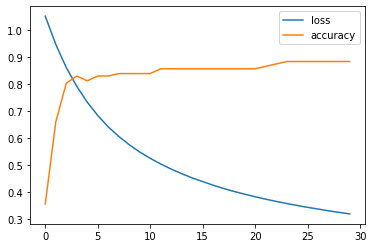

In [8]:
import matplotlib.pyplot as plt
hist_loss = history.history['loss']
hist_acc = history.history['accuracy']
plt.plot(np.arange(len(hist_loss)), hist_loss, label='loss')
plt.plot(np.arange(len(hist_acc)), hist_acc, label='accuracy')
plt.legend()
plt.show()

# リスト 4.7 モデルの評価をする

In [11]:
loss, accuracy = model.evaluate(x_test, t_test)
print("誤差:", loss, "精度:", accuracy)

2/2 [==============================] - 0s 7ms/step - loss: 0.4014 - accuracy: 0.7895
誤差: 0.4013754725456238 精度: 0.7894737124443054


# リスト 4.8 学習済みのモデルで予測をする

In [12]:
y_test = model.predict(x_test)
print(y_test[:10])

[[0.8731936  0.11135687 0.01544943]
 [0.03407756 0.21751189 0.7484105 ]
 [0.9718479  0.02141641 0.0067357 ]
 [0.0065073  0.06636924 0.9271234 ]
 [0.9397209  0.04536123 0.01491781]
 [0.07436828 0.4631744  0.4624573 ]
 [0.16695331 0.7048196  0.12822703]
 [0.10779554 0.28533787 0.6068666 ]
 [0.01848793 0.07846731 0.9030447 ]
 [0.8771939  0.10680807 0.01599803]]
